In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

###Q1

In [0]:
# Python Dict, "data", "test_data", "labels" and "test_labels" are keys
matlab_file = loadmat("/content/drive/My Drive/C&C/ex6/ex6_data.mat")

# Define train and test examples and labels
X_train, X_test, y_train, y_test = matlab_file['data'], matlab_file['test_data'],\
matlab_file['labels'].reshape(-1), matlab_file['test_labels'].reshape(-1)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 12665)
(784, 2115)
(12665,)
(2115,)


###Q3
Done before Q2 as we want to break by this functions the learning of Q2.

In [0]:
''' Fucntion for sampling output from vector of probabilities to be equal 1
  p1: vector of p1's according to test examples
  '''
def sample_output(p1):
  generator = np.vectorize(lambda p: np.random.choice([0,1],p=[1-p,p]))
  return generator(p1)


''' Function for testing the accuracy of a weights vector on test examples
  w: current weights vector
  X: test examples
  labels: labels of test examples
  '''
def test_accuracy(w,X,labels):
  wTx = np.apply_along_axis(lambda example: np.dot(example,w), axis=0,arr=X)  # vec of dim(examples)
  p1 = 1/(1+np.exp(-wTx))
  y = sample_output(p1=p1)
  return np.sum(y == labels) / X.shape[1]

###Q2

In [0]:
ETA = 0.01
w = np.random.normal(0,0.01, size=X_train.shape[0])  # initialization

breaks = np.append(np.arange(start=49, stop=X_train.shape[1], step=50),[X_train.shape[1]-1])
experiment = pd.Series(index=breaks)
for j in range(X_train.shape[1]):
  x = X_train[:,j]
  p1 = 1/(1+np.exp(-np.dot(w,x)))  # p(y=1)
  p0 = 1-p1  # p(y=0)
  y = np.random.choice([0,1],p=[p0,p1])
  r = (y == y_train[j]).astype(int)  # reward of y
  e_w = (y-p1)*x  # eligibility w.r.t the vec w
  w += ETA*r*e_w
  if j in breaks:
    experiment[j] = test_accuracy(w=w,X=X_test,labels=y_test)

###Q4

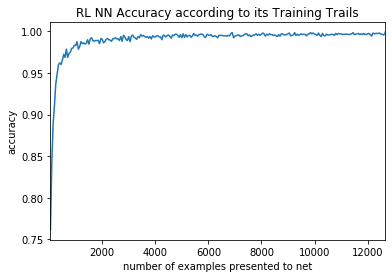

In [63]:
experiment.plot()
plt.title("RL NN Accuracy according to its Training Trails")
plt.xlabel("number of examples presented to net")
plt.ylabel("accuracy")
plt.show()

We can be impressed that after an approximately 700 examples the net achieved good results above the test examples.

###Q5

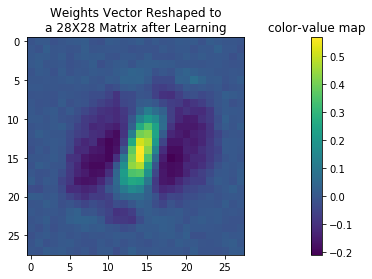

In [64]:
plt.imshow(w.reshape(28,28))
plt.colorbar(pad=0.2).ax.set_title("color-value map")
plt.title("Weights Vector Reshaped to\na 28X28 Matrix after Learning")
plt.show()

It seems that the colors around the digit 1 are contrary to the colors in the area of the digit 0. This picture is a consequence of the way 0\1 digits of the net's learning and the way MNIST data encodes the images. The MNIST encodes the black part of its images as low values (close to 0) and its white part (the places where the digits are written in the image) as high values (close to 1). The learning produces a single weights vector which has to classify every image which will presented to it, so the learning assigns certain weights to the area that approximately corresponding to the ones area in the input vectors, and a cotrary weights to the area that approximately corresponding to the zeros area in the input vectors. As a result, we get the above picture.